# CORRELATIONS ANALYSIS 

In [1]:
import pandas as pd 
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting function
def plot(df):
    for col in df.columns:
        df[[col]].plot()
        plt.title(col)
        plt.xlabel('time')
        plt.ylabel('price')
        
# Correlations Analysis finction     
def correlations_analysis(df):
    display(df.corr())
    sns.pairplot(df)
    plt.show()
    sns.heatmap(df.corr(), annot=True)
    plt.show()

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the data 
main_df = pd.read_csv("../final_data/final_df.csv")
# crypto_df = pd.read_csv("../final_data/crypto_series.csv")
# currency_df = pd.read_csv("../final_data/currency_series.csv")
# commodity_df = pd.read_csv("../final_data/commodity_series.csv")
# rates_df = pd.read_csv("../final_data/rates_series.csv")

In [3]:
# Defining which columns belong to every group of features
crypto_col = ['btc_p', 'ltc_p', 'eth_p', 'xrp_p', 'doge_p']
currency_col = ['usd_gbp','usd_eur', 'usd_yuan', 'usd_yen'] 
curr_var = ['usd_gbp_ %', 'usd_eur_%', 'usd_yuan_%','usd_yen_ %','btc_p', 'ltc_p', 'eth_p', 'xrp_p', 'doge_p']
comm_col = ['wti_oil_pprice', 'brent_oil_p', 'gold_p', 'silver_p','steel_price']
rates_col = ['LIBOR', 'eonia', 'fed_rate']
#Separarting DF for further analysis
crypto = main_df[crypto_col]
currency = main_df[currency_col]
curr_var = main_df[curr_var]
commodity = main_df[comm_col]
rates = main_df[rates_col]

# with Datetime index:
# main_df = main_df.set_index('date')
# crypto_df = crypto_df.set_index('date')
# currency_df = currency_df.set_index('date')
# commodity_df = commodity_df.set_index('date')
# rates_df = rates_df.set_index('date')

In [4]:
# curr_btc = main_df[['date','usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','btc_p']]
# curr_ltc = main_df[['date','usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','ltc_p']]
# curr_eth = main_df[['date','usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','eth_p']]
# curr_xrp = main_df[['date','usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','xrp_p']]
# curr_doge= main_df[['date','usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','doge_p']]


In [5]:
# the Dfs have the same number of rows that correspond to the same number of days of trade. 
#Thus, for the correlations analysis I will not datetime index.
### MULTICOLINEARITY
# CURRENCY PRICES IN $ Vs CRYPTO PRICES 
curr_btc = main_df[['usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','btc_p']]
curr_ltc = main_df[['usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','ltc_p']]
curr_eth = main_df[['usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','eth_p']]
curr_xrp = main_df[['usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','xrp_p']]
curr_doge= main_df[['usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','doge_p']]

# CURRENCY PRICE VARIATION Vs CRYPTO PRICES 
curr_var_btc = main_df[['usd_gbp_ %','usd_eur_%','usd_yuan_%','usd_yen_ %','btc_p']]
curr_var_ltc = main_df[['usd_gbp_ %','usd_eur_%','usd_yuan_%','usd_yen_ %','ltc_p']]
curr_var_eth = main_df[['usd_gbp_ %','usd_eur_%','usd_yuan_%','usd_yen_ %','eth_p']]
curr_var_xrp = main_df[['usd_gbp_ %','usd_eur_%','usd_yuan_%','usd_yen_ %','xrp_p']]
curr_var_doge= main_df[['usd_gbp_ %','usd_eur_%','usd_yuan_%','usd_yen_ %','doge_p']]

# COMMODITY PRICES Vs CRYPTO PRICES 
comm_btc = main_df[['wti_oil_pprice', 'brent_oil_p', 'gold_p', 'silver_p', 'steel_price', 'btc_p']]
comm_ltc = main_df[['wti_oil_pprice', 'brent_oil_p', 'gold_p', 'silver_p', 'steel_price', 'ltc_p']]
comm_eth = main_df[['wti_oil_pprice', 'brent_oil_p', 'gold_p', 'silver_p', 'steel_price', 'eth_p']]
comm_xrp = main_df[['wti_oil_pprice', 'brent_oil_p', 'gold_p', 'silver_p', 'steel_price', 'xrp_p']]
comm_doge= main_df[['wti_oil_pprice', 'brent_oil_p', 'gold_p', 'silver_p', 'steel_price', 'doge_p']]

# INTEREST RATES Vs CRYPTO PRICES 
rates_btc = main_df[['LIBOR', 'eonia', 'fed_rate', 'btc_p']]
rates_ltc = main_df[['LIBOR', 'eonia', 'fed_rate', 'ltc_p']]
rates_eth = main_df[['LIBOR', 'eonia', 'fed_rate', 'eth_p']]
rates_xrp = main_df[['LIBOR', 'eonia', 'fed_rate', 'xrp_p']]
rates_doge= main_df[['LIBOR', 'eonia', 'fed_rate', 'doge_p']]

# Exploratory Analysis

CURRENCY PRICES (in $) Vs CRYPTO PRICES

Visual inspection of currencies and cryptos

In [76]:
# plot(crypto)

In [77]:
# plot(currency)

In [78]:
# plot(commodity)

In [79]:
# plot(rates)

# Check Multicollinearity and correlation between currencies Vs Crytpos:

Currencies Vs each Crypto:

I will only consider correlations over 0.5 as significant for the analysis

In [6]:
curr_btc = main_df[['usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','btc_p']]
curr_ltc = main_df[['usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','ltc_p']]
curr_eth = main_df[['usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','eth_p']]
curr_xrp = main_df[['usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','xrp_p']]
curr_doge= main_df[['usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','doge_p']]

usd_gbp   usd_eur  usd_yuan   usd_yen     btc_p
usd_gbp   1.000000  0.583443  0.809709 -0.060664 -0.357982
usd_eur   0.583443  1.000000  0.652207  0.250636 -0.451465
usd_yuan  0.809709  0.652207  1.000000 -0.010215 -0.456657
usd_yen  -0.060664  0.250636 -0.010215  1.000000  0.012693
btc_p    -0.357982 -0.451465 -0.456657  0.012693  1.000000

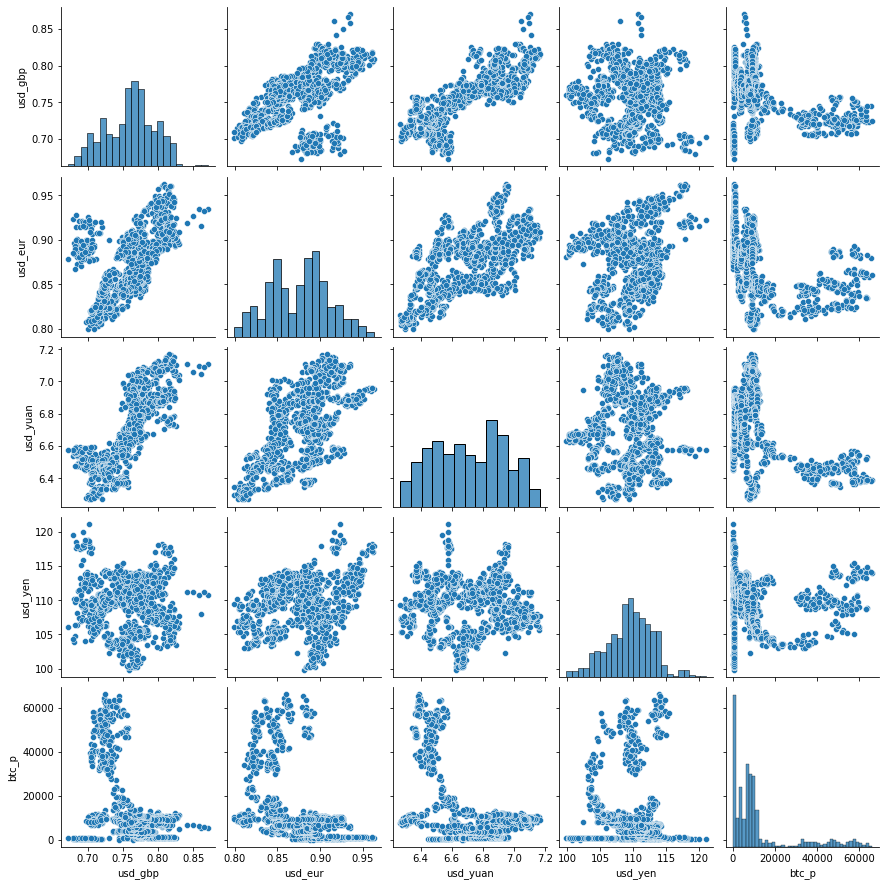

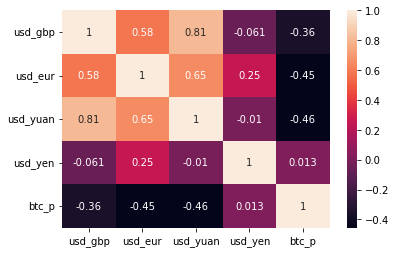

In [7]:
correlations_analysis(curr_btc)
# correlated between them but not majorly to  BTC gbp(-0.36), eur(-0.45), yuan(-0.45), yen(0.01)

usd_gbp   usd_eur  usd_yuan   usd_yen     ltc_p
usd_gbp   1.000000  0.583443  0.809709 -0.060664 -0.394245
usd_eur   0.583443  1.000000  0.652207  0.250636 -0.657508
usd_yuan  0.809709  0.652207  1.000000 -0.010215 -0.534690
usd_yen  -0.060664  0.250636 -0.010215  1.000000  0.012760
ltc_p    -0.394245 -0.657508 -0.534690  0.012760  1.000000

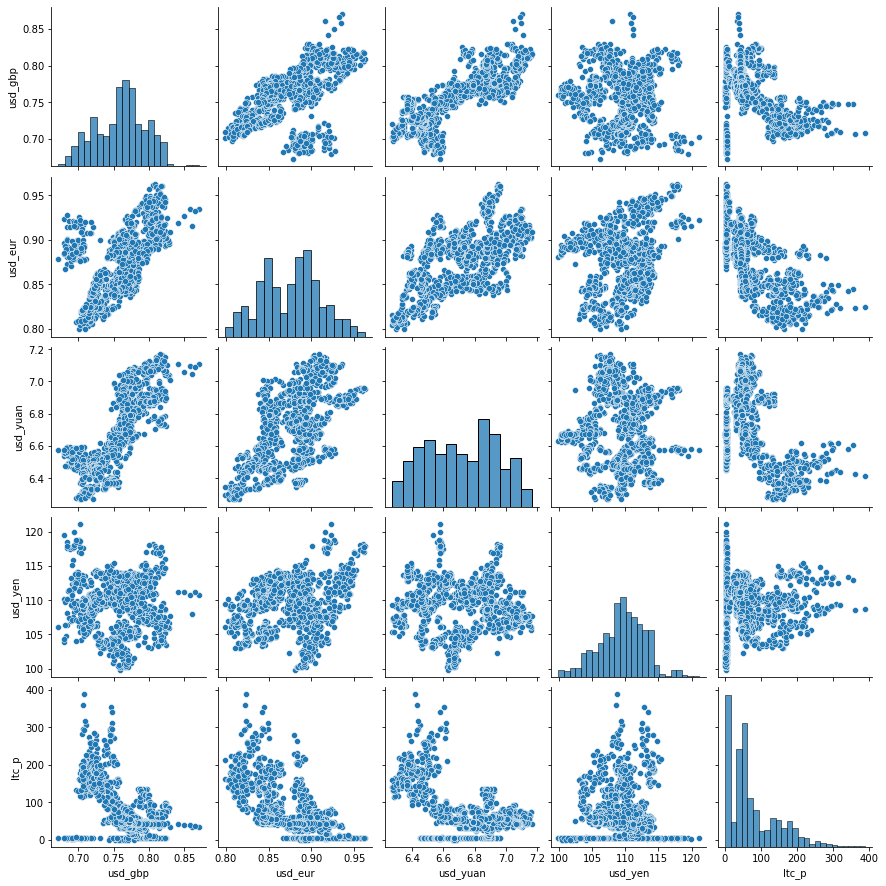

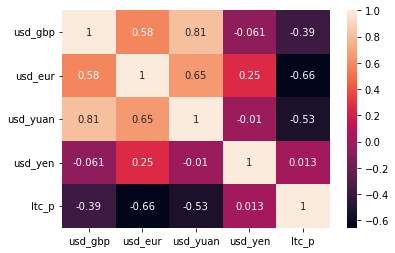

In [8]:
correlations_analysis(curr_ltc)
##### EUR (-0.65)  Yuan (-0.53)

usd_gbp   usd_eur  usd_yuan   usd_yen     eth_p
usd_gbp   1.000000  0.583443  0.809709 -0.060664 -0.388603
usd_eur   0.583443  1.000000  0.652207  0.250636 -0.413049
usd_yuan  0.809709  0.652207  1.000000 -0.010215 -0.546609
usd_yen  -0.060664  0.250636 -0.010215  1.000000  0.132633
eth_p    -0.388603 -0.413049 -0.546609  0.132633  1.000000

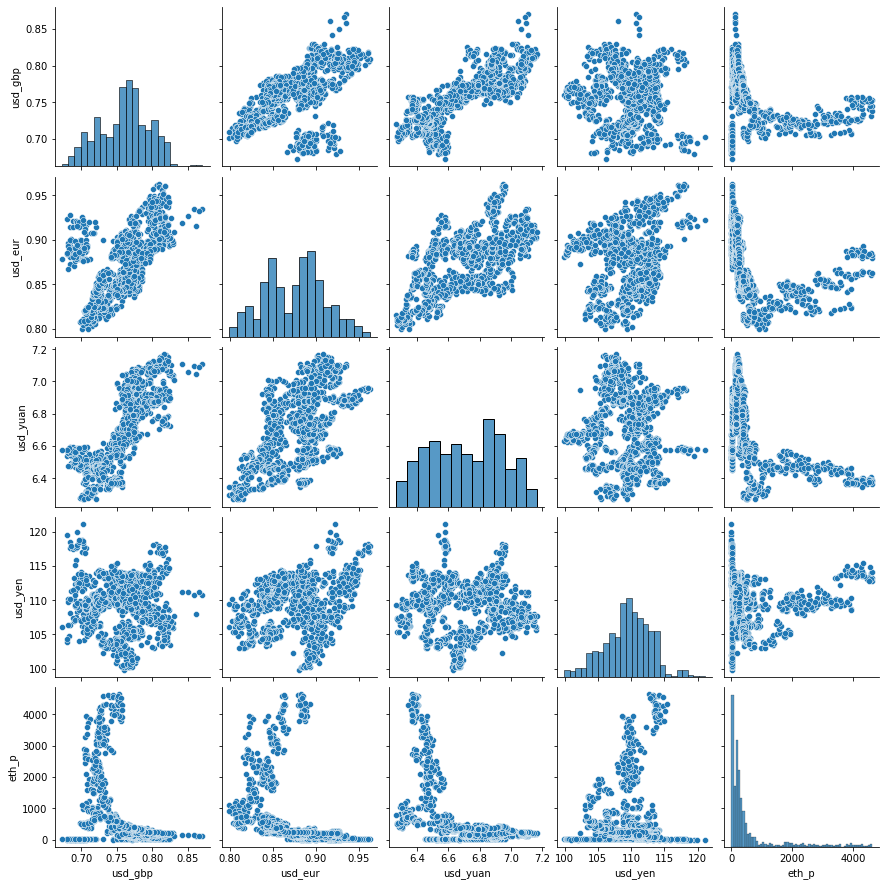

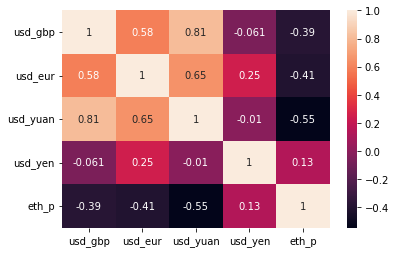

In [9]:
correlations_analysis(curr_eth) 
# Yuan (-0.54)

usd_gbp   usd_eur  usd_yuan   usd_yen     xrp_p
usd_gbp   1.000000  0.583443  0.809709 -0.060664 -0.341511
usd_eur   0.583443  1.000000  0.652207  0.250636 -0.576439
usd_yuan  0.809709  0.652207  1.000000 -0.010215 -0.454125
usd_yen  -0.060664  0.250636 -0.010215  1.000000  0.083605
xrp_p    -0.341511 -0.576439 -0.454125  0.083605  1.000000

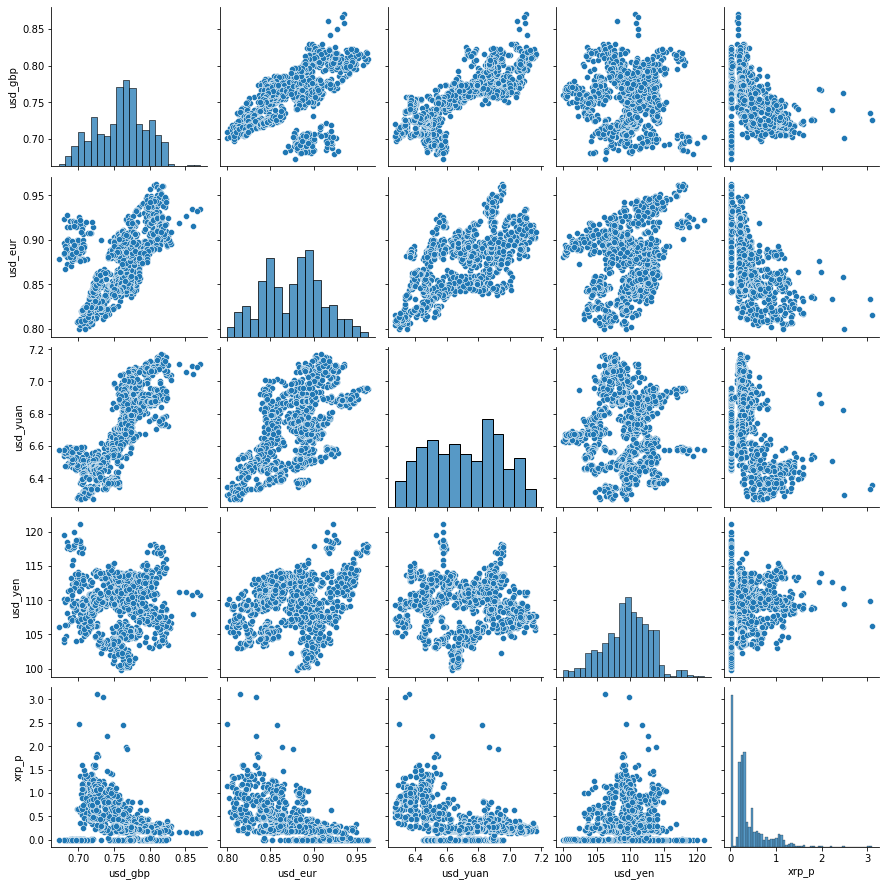

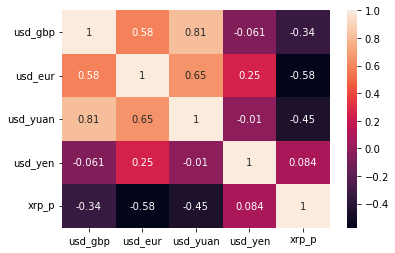

In [10]:
correlations_analysis(curr_xrp)
# Eur (-0.57)

usd_gbp   usd_eur  usd_yuan   usd_yen    doge_p
usd_gbp   1.000000  0.583443  0.809709 -0.060664 -0.289624
usd_eur   0.583443  1.000000  0.652207  0.250636 -0.218629
usd_yuan  0.809709  0.652207  1.000000 -0.010215 -0.402028
usd_yen  -0.060664  0.250636 -0.010215  1.000000  0.141675
doge_p   -0.289624 -0.218629 -0.402028  0.141675  1.000000

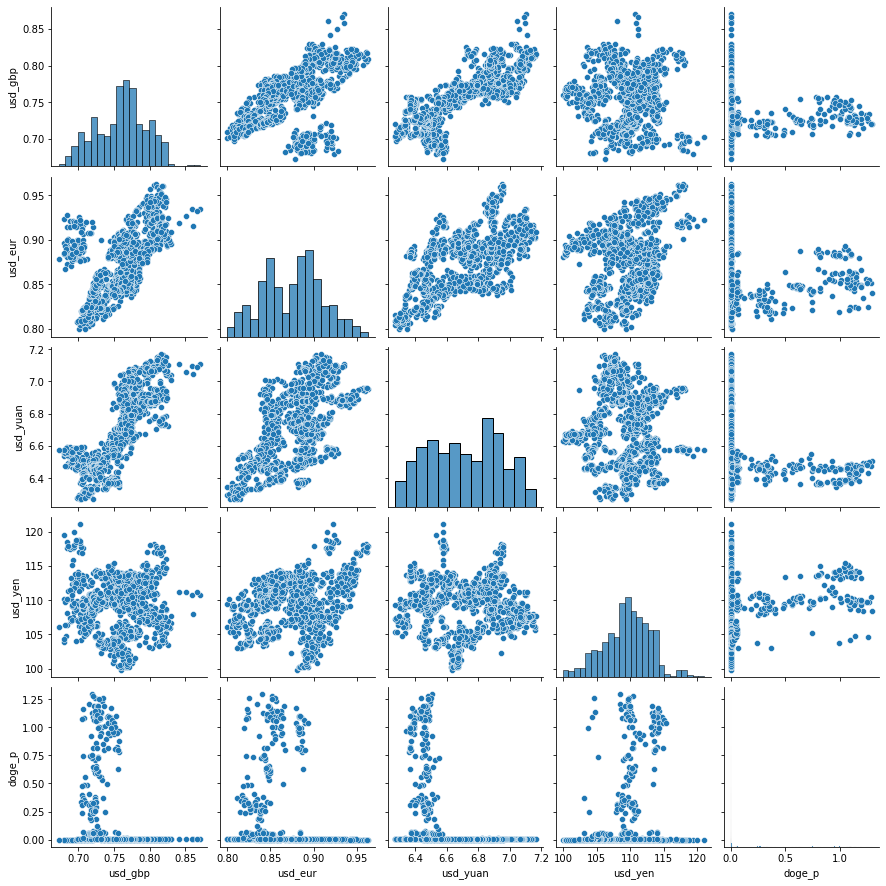

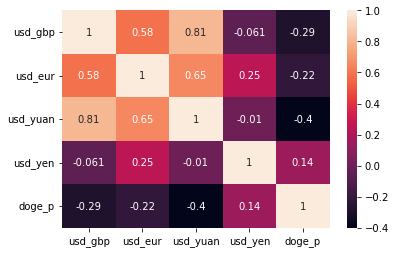

In [12]:
correlations_analysis(curr_doge)

# Check Multicollinearity and correlation between  currencies daily variation Vs Cryptos :

Needs transforming the %  into floats

In [13]:
# BTC
curr_var_btc['usd_eur_%']  = curr_var_btc['usd_eur_%'].astype('str')
curr_var_btc['usd_yuan_%'] = curr_var_btc['usd_yuan_%'].astype('str')
curr_var_btc['usd_yen_ %'] = curr_var_btc['usd_yen_ %'].astype('str')

curr_var_btc['usd_gbp_ %'] = curr_var_btc['usd_gbp_ %'].str.rstrip('%').astype('float') / 100.0
curr_var_btc['usd_eur_%'] = curr_var_btc['usd_eur_%'].str.rstrip('%').astype('float') / 100.0
curr_var_btc['usd_yuan_%'] = curr_var_btc['usd_yuan_%'].str.rstrip('%').astype('float') / 100.0
curr_var_btc['usd_yen_ %'] = curr_var_btc['usd_yen_ %'].str.rstrip('%').astype('float') / 100.0

# LTC
curr_var_ltc['usd_eur_%']  =curr_var_ltc['usd_eur_%'].astype('str')
curr_var_ltc['usd_yuan_%'] =curr_var_ltc['usd_yuan_%'].astype('str')
curr_var_ltc['usd_yen_ %'] =curr_var_ltc['usd_yen_ %'].astype('str')

curr_var_ltc['usd_gbp_ %'] = curr_var_ltc['usd_gbp_ %'].str.rstrip('%').astype('float') / 100.0
curr_var_ltc['usd_eur_%'] = curr_var_ltc['usd_eur_%'].str.rstrip('%').astype('float') / 100.0
curr_var_ltc['usd_yuan_%'] = curr_var_ltc['usd_yuan_%'].str.rstrip('%').astype('float') / 100.0
curr_var_ltc['usd_yen_ %'] = curr_var_ltc['usd_yen_ %'].str.rstrip('%').astype('float') / 100.0

# ETH
curr_var_eth['usd_eur_%']  =curr_var_eth['usd_eur_%'].astype('str')
curr_var_eth['usd_yuan_%'] =curr_var_eth['usd_yuan_%'].astype('str')
curr_var_eth['usd_yen_ %'] =curr_var_eth['usd_yen_ %'].astype('str')

curr_var_eth['usd_gbp_ %'] = curr_var_eth['usd_gbp_ %'].str.rstrip('%').astype('float') / 100.0
curr_var_eth['usd_eur_%'] = curr_var_eth['usd_eur_%'].str.rstrip('%').astype('float') / 100.0
curr_var_eth['usd_yuan_%'] = curr_var_eth['usd_yuan_%'].str.rstrip('%').astype('float') / 100.0
curr_var_eth['usd_yen_ %'] = curr_var_eth['usd_yen_ %'].str.rstrip('%').astype('float') / 100.0

# XRP
curr_var_xrp['usd_eur_%']  =curr_var_xrp['usd_eur_%'].astype('str')
curr_var_xrp['usd_yuan_%'] =curr_var_xrp['usd_yuan_%'].astype('str')
curr_var_xrp['usd_yen_ %'] =curr_var_xrp['usd_yen_ %'].astype('str')

curr_var_xrp['usd_gbp_ %'] = curr_var_xrp['usd_gbp_ %'].str.rstrip('%').astype('float') / 100.0
curr_var_xrp['usd_eur_%'] = curr_var_xrp['usd_eur_%'].str.rstrip('%').astype('float') / 100.0
curr_var_xrp['usd_yuan_%'] = curr_var_xrp['usd_yuan_%'].str.rstrip('%').astype('float') / 100.0
curr_var_xrp['usd_yen_ %'] = curr_var_xrp['usd_yen_ %'].str.rstrip('%').astype('float') / 100.0

# DOGE
curr_var_doge['usd_eur_%']  =curr_var_doge['usd_eur_%'].astype('str')
curr_var_doge['usd_yuan_%'] =curr_var_doge['usd_yuan_%'].astype('str')
curr_var_doge['usd_yen_ %'] =curr_var_doge['usd_yen_ %'].astype('str')

curr_var_doge['usd_gbp_ %'] = curr_var_doge['usd_gbp_ %'].str.rstrip('%').astype('float') / 100.0
curr_var_doge['usd_eur_%'] = curr_var_doge['usd_eur_%'].str.rstrip('%').astype('float') / 100.0
curr_var_doge['usd_yuan_%'] = curr_var_doge['usd_yuan_%'].str.rstrip('%').astype('float') / 100.0
curr_var_doge['usd_yen_ %'] = curr_var_doge['usd_yen_ %'].str.rstrip('%').astype('float') / 100.0


/var/folders/hq/x_513gjd2qsd86w2rwvd665m0000gn/T/ipykernel_45578/3952393331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_var_btc['usd_eur_%']  = curr_var_btc['usd_eur_%'].astype('str')
/var/folders/hq/x_513gjd2qsd86w2rwvd665m0000gn/T/ipykernel_45578/3952393331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_var_btc['usd_yuan_%'] = curr_var_btc['usd_yuan_%'].astype('str')
/var/folders/hq/x_513gjd2qsd86w2rwvd665m0000gn/T/ipykernel_45578/3952393331.py:4: SettingWithCopyWarning: 
A value is

In [14]:
curr_var_df_list = [curr_var_btc,curr_var_ltc ,curr_var_eth,curr_var_xrp,curr_var_doge]

usd_gbp_ %  usd_eur_%  usd_yuan_%  usd_yen_ %     btc_p
usd_gbp_ %    1.000000   0.568058    0.290136    0.140797 -0.018669
usd_eur_%     0.568058   1.000000    0.298909    0.399649  0.008532
usd_yuan_%    0.290136   0.298909    1.000000    0.108036 -0.054778
usd_yen_ %    0.140797   0.399649    0.108036    1.000000  0.022068
btc_p        -0.018669   0.008532   -0.054778    0.022068  1.000000

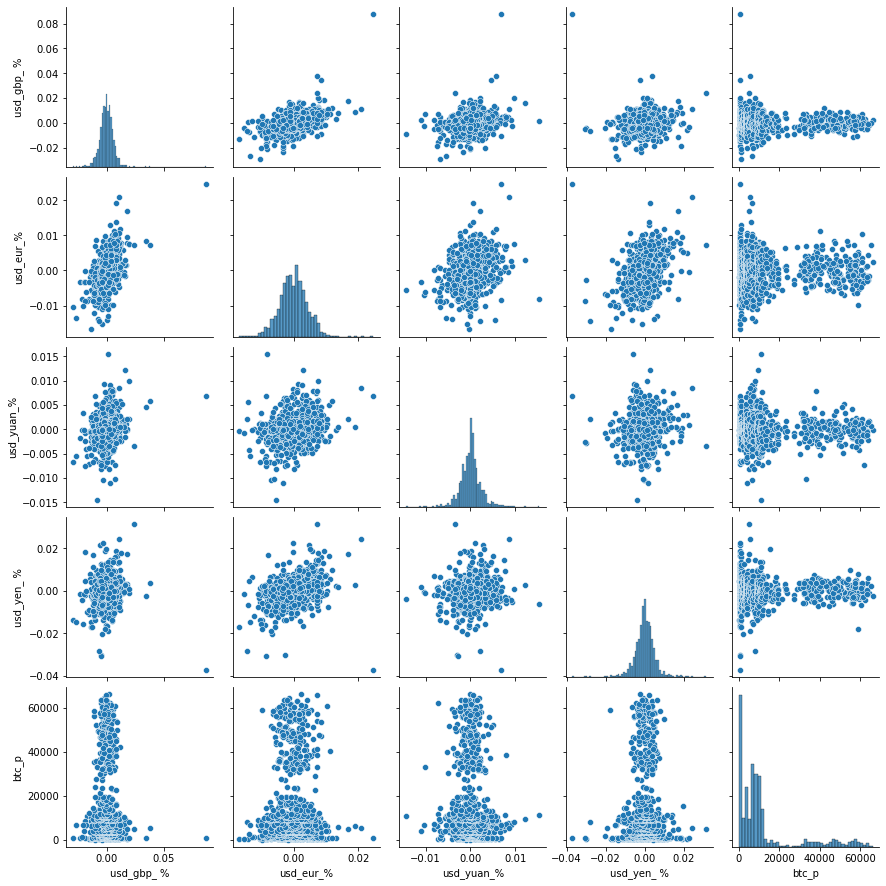

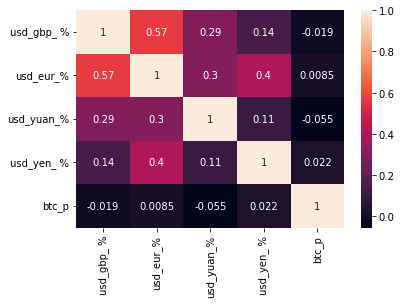

usd_gbp_ %  usd_eur_%  usd_yuan_%  usd_yen_ %     ltc_p
usd_gbp_ %    1.000000   0.568058    0.290136    0.140797 -0.017871
usd_eur_%     0.568058   1.000000    0.298909    0.399649  0.015218
usd_yuan_%    0.290136   0.298909    1.000000    0.108036 -0.050623
usd_yen_ %    0.140797   0.399649    0.108036    1.000000  0.004256
ltc_p        -0.017871   0.015218   -0.050623    0.004256  1.000000

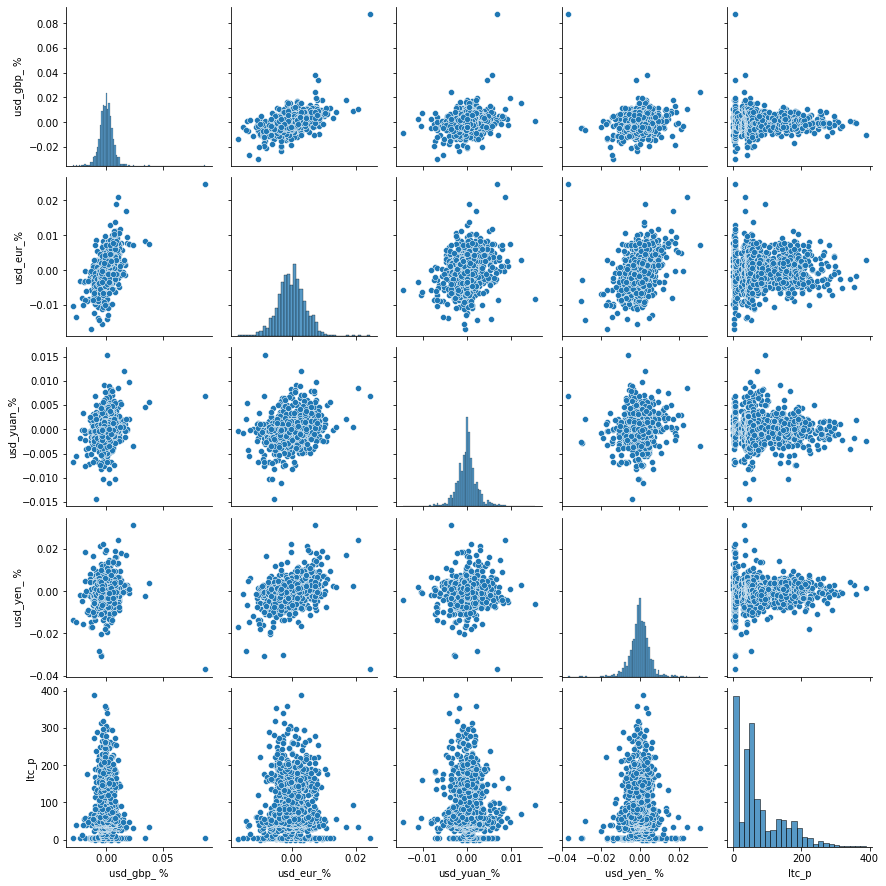

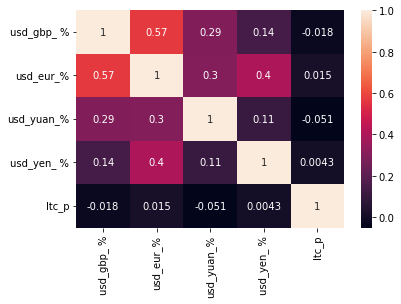

usd_gbp_ %  usd_eur_%  usd_yuan_%  usd_yen_ %     eth_p
usd_gbp_ %    1.000000   0.568058    0.290136    0.140797 -0.007165
usd_eur_%     0.568058   1.000000    0.298909    0.399649  0.014504
usd_yuan_%    0.290136   0.298909    1.000000    0.108036 -0.045726
usd_yen_ %    0.140797   0.399649    0.108036    1.000000  0.018739
eth_p        -0.007165   0.014504   -0.045726    0.018739  1.000000

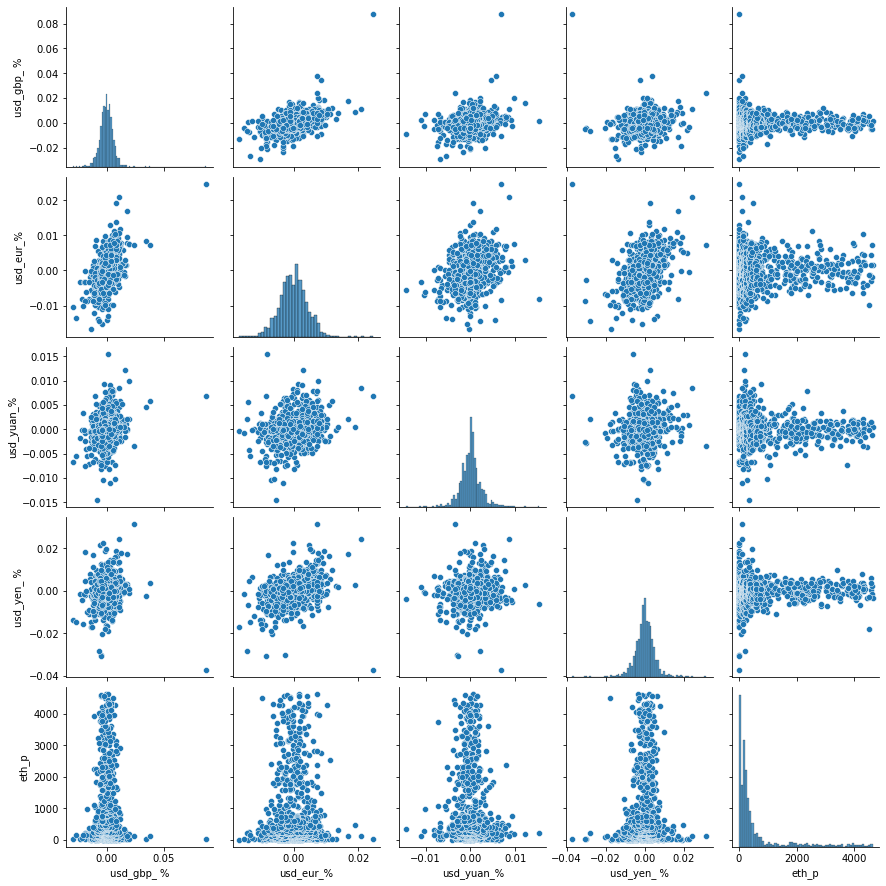

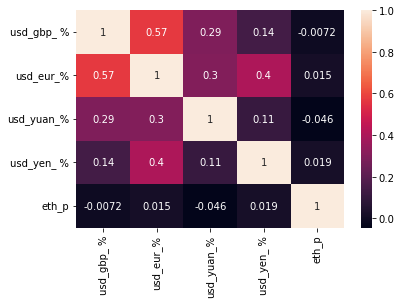

usd_gbp_ %  usd_eur_%  usd_yuan_%  usd_yen_ %     xrp_p
usd_gbp_ %    1.000000   0.568058    0.290136    0.140797 -0.023143
usd_eur_%     0.568058   1.000000    0.298909    0.399649 -0.007586
usd_yuan_%    0.290136   0.298909    1.000000    0.108036 -0.063579
usd_yen_ %    0.140797   0.399649    0.108036    1.000000 -0.000558
xrp_p        -0.023143  -0.007586   -0.063579   -0.000558  1.000000

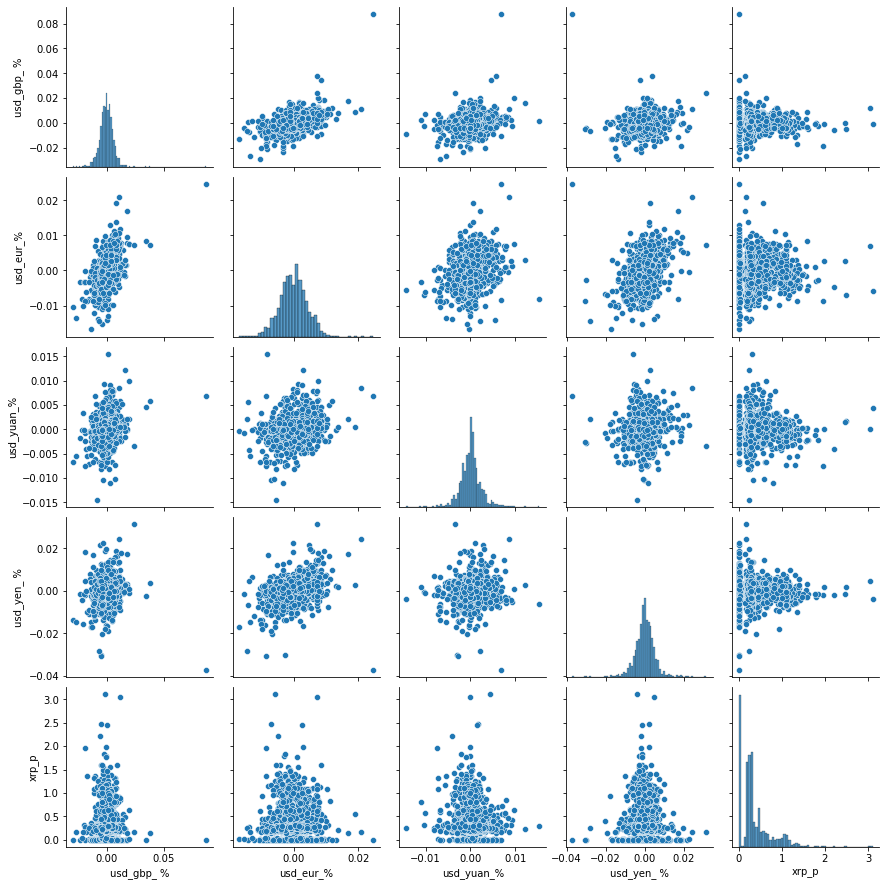

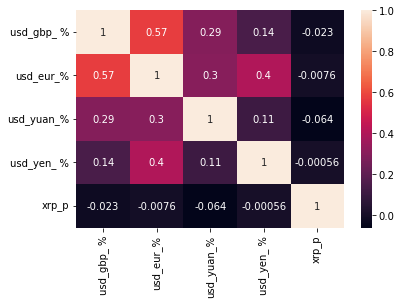

usd_gbp_ %  usd_eur_%  usd_yuan_%  usd_yen_ %    doge_p
usd_gbp_ %    1.000000   0.568058    0.290136    0.140797 -0.015625
usd_eur_%     0.568058   1.000000    0.298909    0.399649  0.005295
usd_yuan_%    0.290136   0.298909    1.000000    0.108036 -0.048481
usd_yen_ %    0.140797   0.399649    0.108036    1.000000  0.020602
doge_p       -0.015625   0.005295   -0.048481    0.020602  1.000000

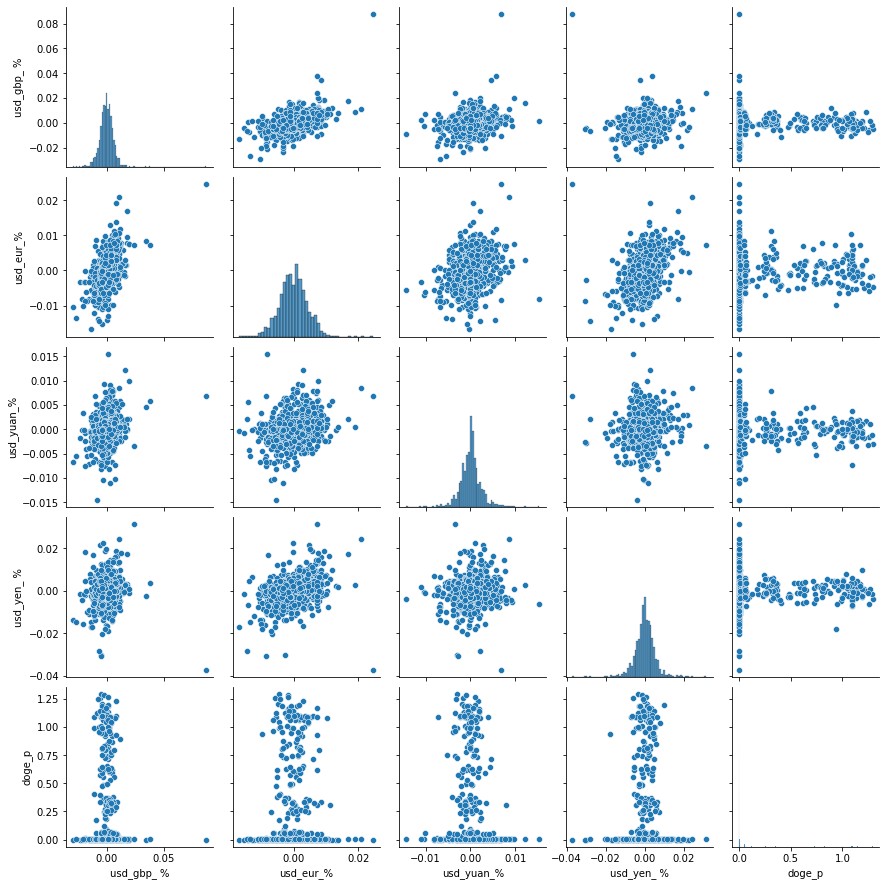

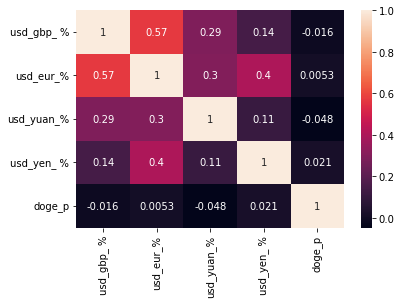

In [15]:
for i in curr_var_df_list:
    correlations_analysis(i)

None of the variances on currency oprices seem to have any remarkable effect on crytpos prices

 # Check Multicollinearity and correlation between  Commodities pirces Vs Cryptos :

In [187]:
comm_df_list = [comm_btc,comm_ltc,comm_eth,comm_xrp,comm_doge]

wti_oil_pprice  brent_oil_p    gold_p  silver_p  steel_price  \
wti_oil_pprice        1.000000     0.976363  0.017527  0.180686     0.472980   
brent_oil_p           0.976363     1.000000 -0.047638  0.082087     0.421704   
gold_p                0.017527    -0.047638  1.000000  0.844077     0.576983   
silver_p              0.180686     0.082087  0.844077  1.000000     0.729161   
steel_price           0.472980     0.421704  0.576983  0.729161     1.000000   
btc_p                 0.503785     0.432818  0.687705  0.731815     0.764024   

                   btc_p  
wti_oil_pprice  0.503785  
brent_oil_p     0.432818  
gold_p          0.687705  
silver_p        0.731815  
steel_price     0.764024  
btc_p           1.000000

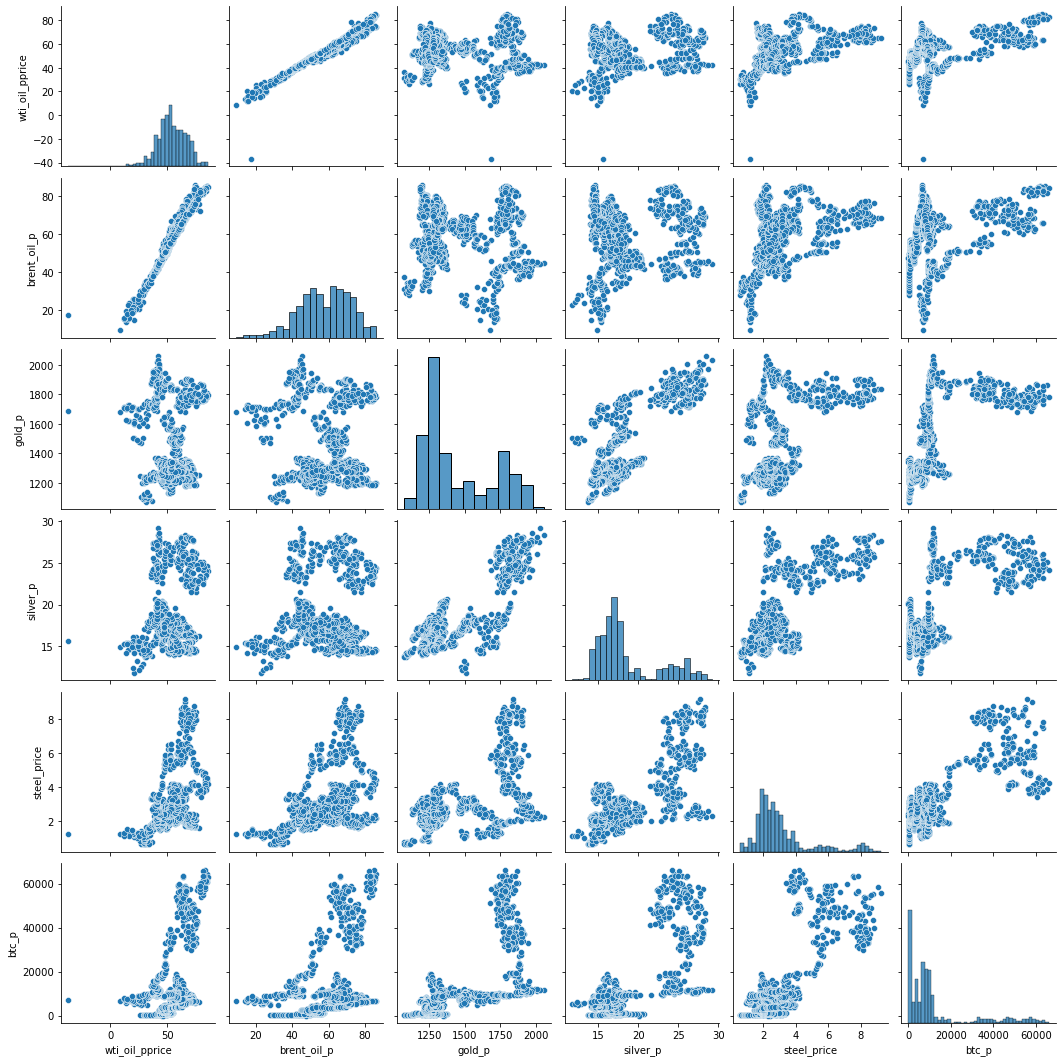

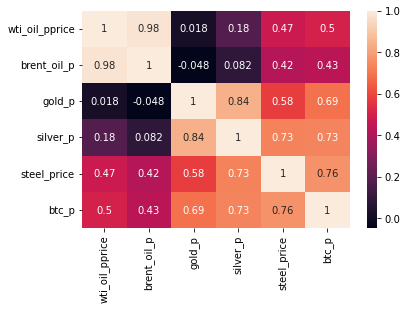

wti_oil_pprice  brent_oil_p    gold_p  silver_p  steel_price  \
wti_oil_pprice        1.000000     0.976363  0.017527  0.180686     0.472980   
brent_oil_p           0.976363     1.000000 -0.047638  0.082087     0.421704   
gold_p                0.017527    -0.047638  1.000000  0.844077     0.576983   
silver_p              0.180686     0.082087  0.844077  1.000000     0.729161   
steel_price           0.472980     0.421704  0.576983  0.729161     1.000000   
ltc_p                 0.592614     0.567201  0.448890  0.465340     0.601280   

                   ltc_p  
wti_oil_pprice  0.592614  
brent_oil_p     0.567201  
gold_p          0.448890  
silver_p        0.465340  
steel_price     0.601280  
ltc_p           1.000000

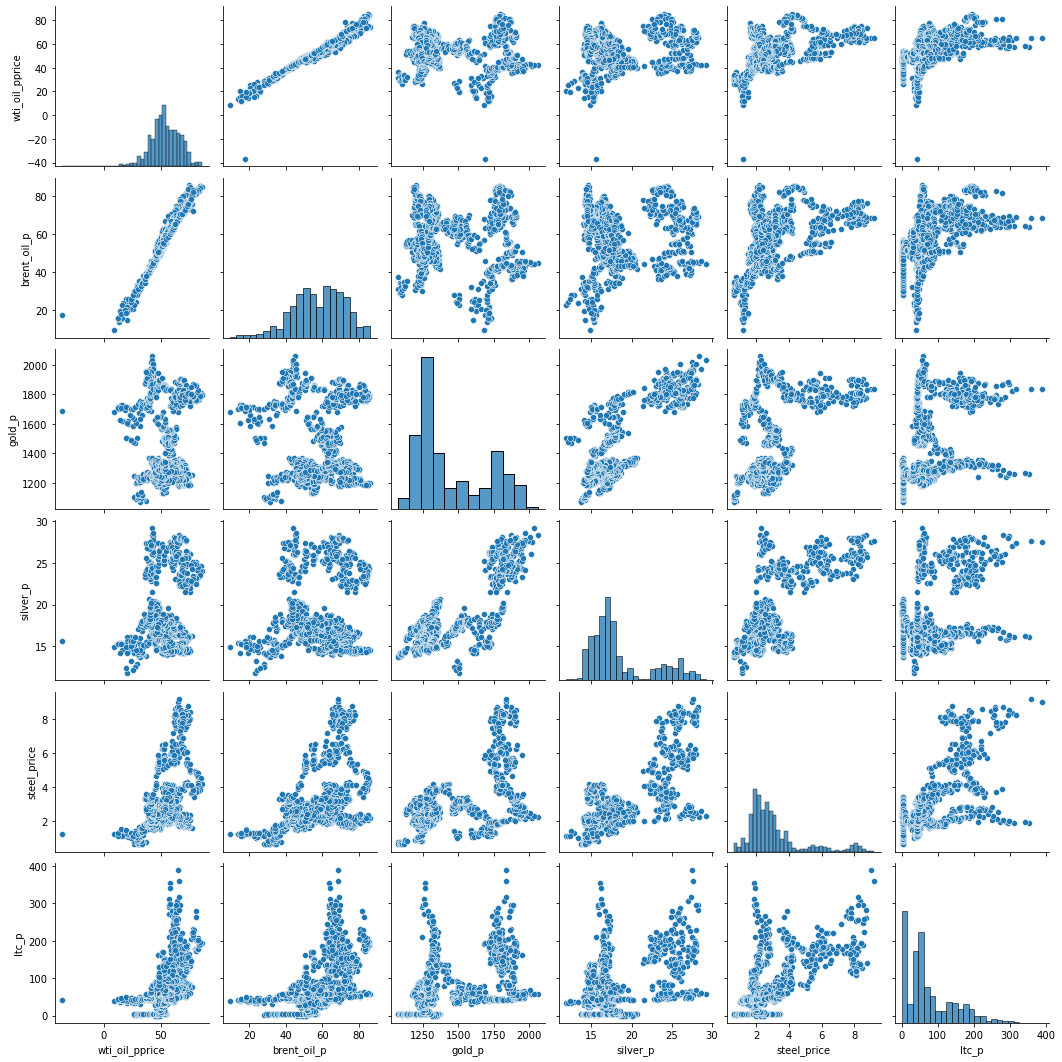

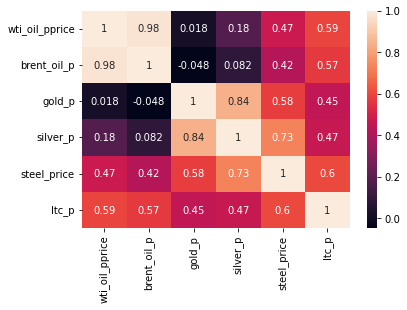

wti_oil_pprice  brent_oil_p    gold_p  silver_p  steel_price  \
wti_oil_pprice        1.000000     0.976363  0.017527  0.180686     0.472980   
brent_oil_p           0.976363     1.000000 -0.047638  0.082087     0.421704   
gold_p                0.017527    -0.047638  1.000000  0.844077     0.576983   
silver_p              0.180686     0.082087  0.844077  1.000000     0.729161   
steel_price           0.472980     0.421704  0.576983  0.729161     1.000000   
eth_p                 0.568518     0.489569  0.572223  0.631688     0.681755   

                   eth_p  
wti_oil_pprice  0.568518  
brent_oil_p     0.489569  
gold_p          0.572223  
silver_p        0.631688  
steel_price     0.681755  
eth_p           1.000000

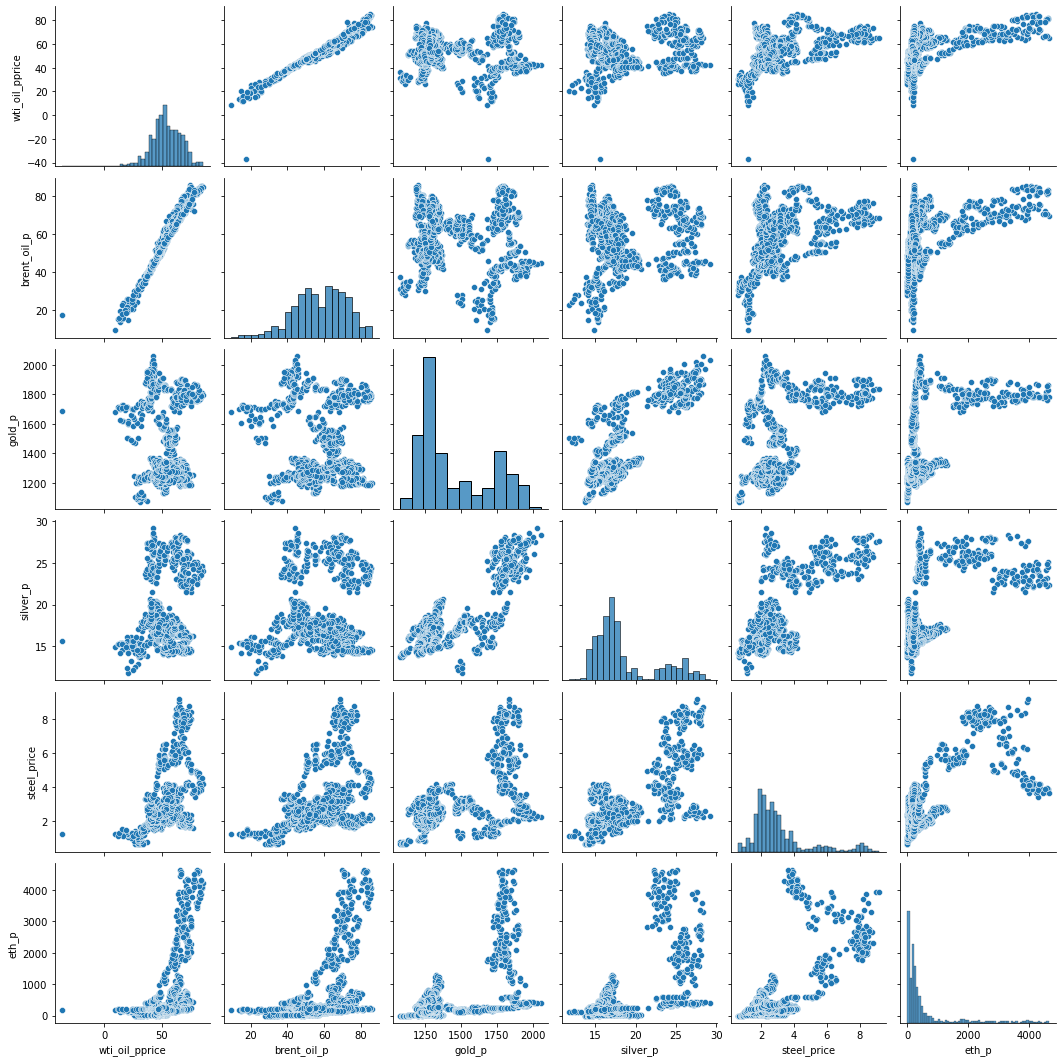

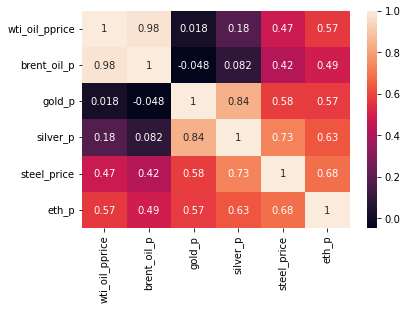

wti_oil_pprice  brent_oil_p    gold_p  silver_p  steel_price  \
wti_oil_pprice        1.000000     0.976363  0.017527  0.180686     0.472980   
brent_oil_p           0.976363     1.000000 -0.047638  0.082087     0.421704   
gold_p                0.017527    -0.047638  1.000000  0.844077     0.576983   
silver_p              0.180686     0.082087  0.844077  1.000000     0.729161   
steel_price           0.472980     0.421704  0.576983  0.729161     1.000000   
xrp_p                 0.590185     0.568293  0.339619  0.343853     0.494653   

                   xrp_p  
wti_oil_pprice  0.590185  
brent_oil_p     0.568293  
gold_p          0.339619  
silver_p        0.343853  
steel_price     0.494653  
xrp_p           1.000000

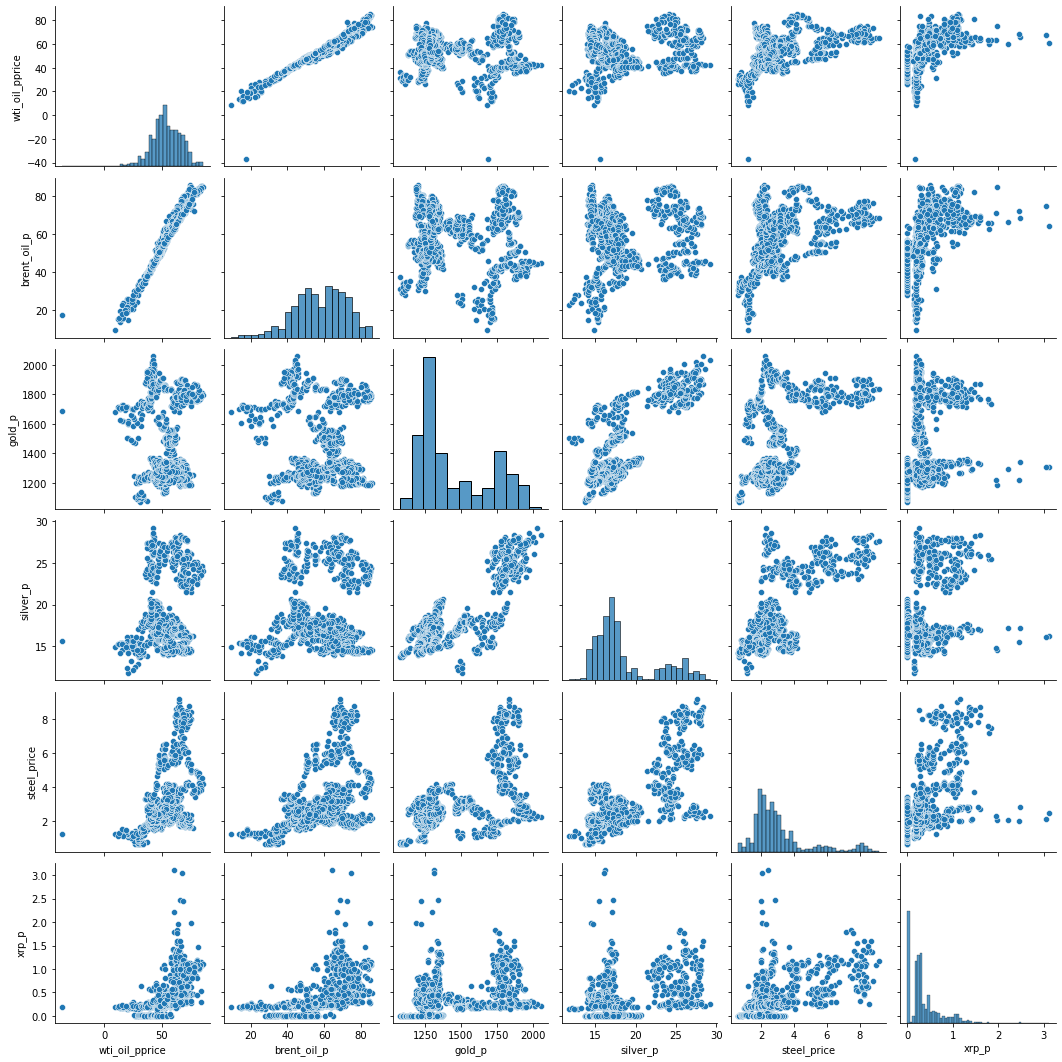

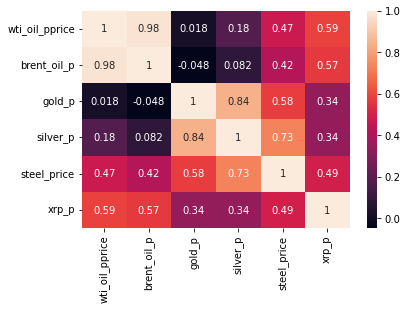

wti_oil_pprice  brent_oil_p    gold_p  silver_p  steel_price  \
wti_oil_pprice        1.000000     0.976363  0.017527  0.180686     0.472980   
brent_oil_p           0.976363     1.000000 -0.047638  0.082087     0.421704   
gold_p                0.017527    -0.047638  1.000000  0.844077     0.576983   
silver_p              0.180686     0.082087  0.844077  1.000000     0.729161   
steel_price           0.472980     0.421704  0.576983  0.729161     1.000000   
doge_p                0.455798     0.386043  0.456379  0.500248     0.580082   

                  doge_p  
wti_oil_pprice  0.455798  
brent_oil_p     0.386043  
gold_p          0.456379  
silver_p        0.500248  
steel_price     0.580082  
doge_p          1.000000

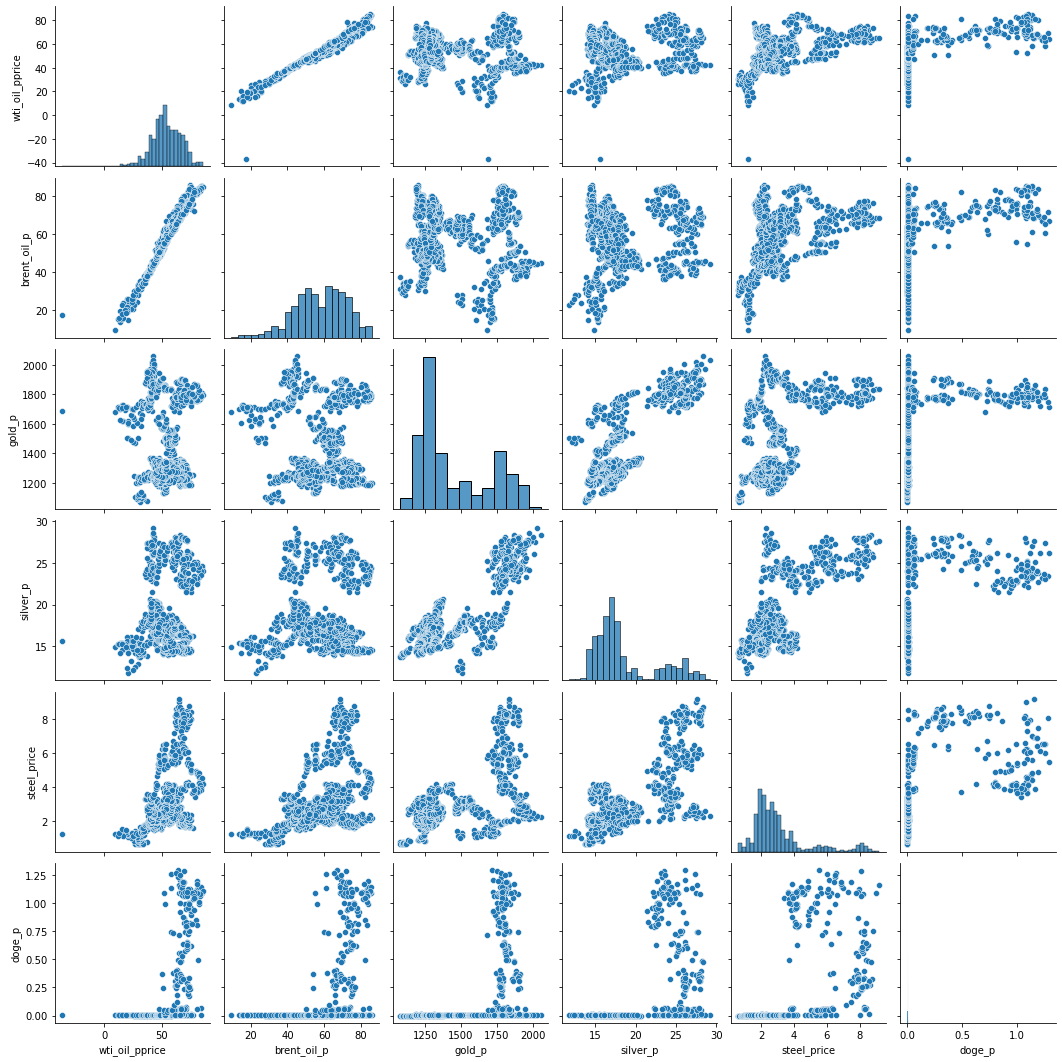

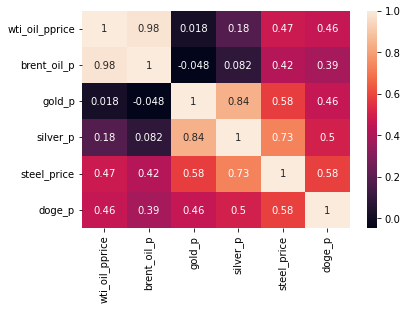

In [188]:
for i in comm_df_list:
    correlations_analysis(i)
    

# Check Multicollinearity and correlation between  Interest rates Vs Cryptos:

In [189]:
rates_df_list = [rates_btc,rates_ltc ,rates_eth,rates_xrp,rates_doge]

LIBOR     eonia  fed_rate     btc_p
LIBOR     1.000000  0.383357  0.999565 -0.411047
eonia     0.383357  1.000000  0.370571 -0.699977
fed_rate  0.999565  0.370571  1.000000 -0.401164
btc_p    -0.411047 -0.699977 -0.401164  1.000000

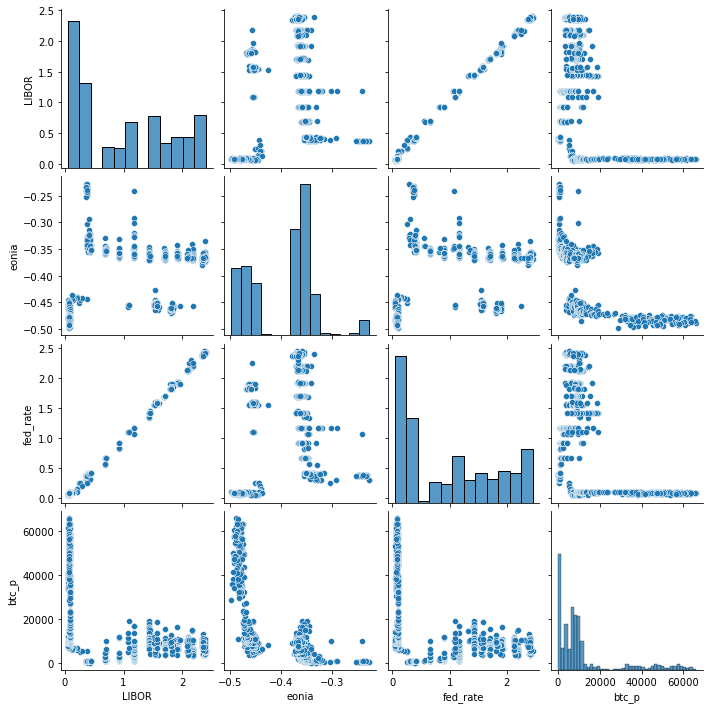

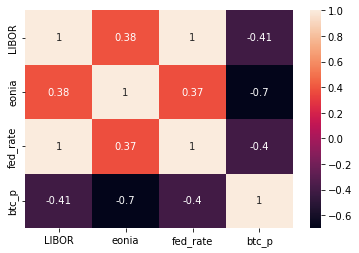

LIBOR     eonia  fed_rate     ltc_p
LIBOR     1.000000  0.383357  0.999565 -0.056135
eonia     0.383357  1.000000  0.370571 -0.491476
fed_rate  0.999565  0.370571  1.000000 -0.050675
ltc_p    -0.056135 -0.491476 -0.050675  1.000000

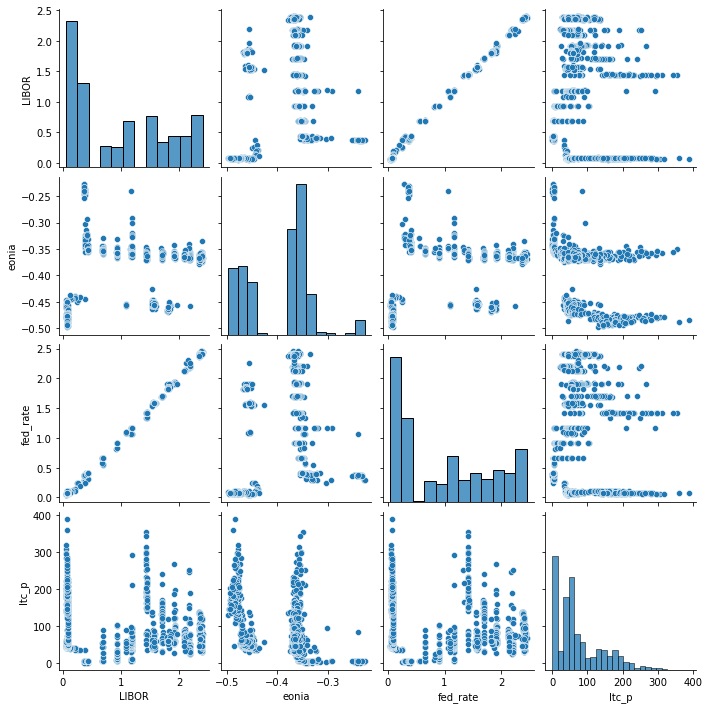

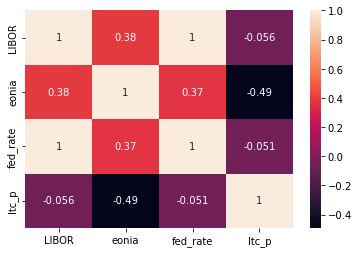

LIBOR     eonia  fed_rate     eth_p
LIBOR     1.000000  0.383357  0.999565 -0.385428
eonia     0.383357  1.000000  0.370571 -0.585723
fed_rate  0.999565  0.370571  1.000000 -0.377940
eth_p    -0.385428 -0.585723 -0.377940  1.000000

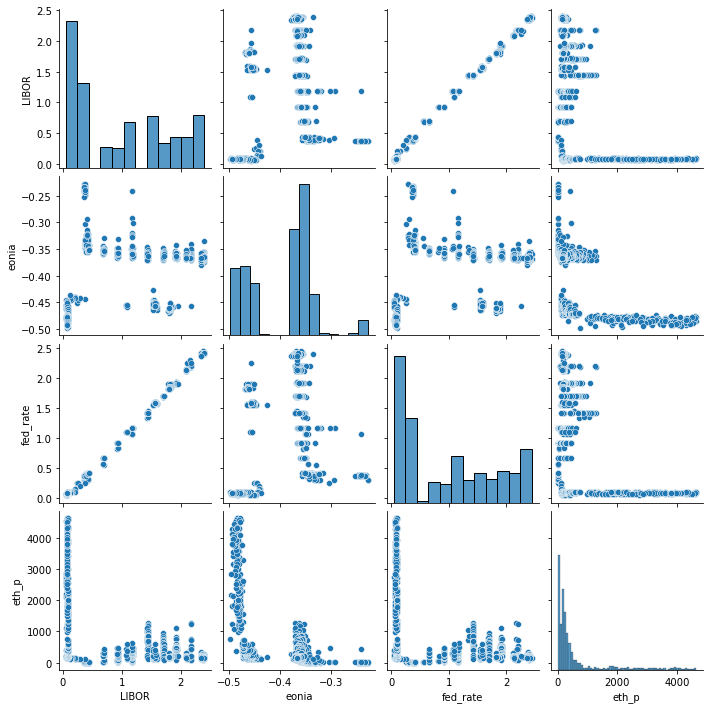

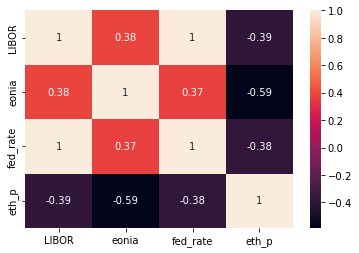

LIBOR     eonia  fed_rate     xrp_p
LIBOR     1.000000  0.383357  0.999565 -0.000652
eonia     0.383357  1.000000  0.370571 -0.405004
fed_rate  0.999565  0.370571  1.000000  0.003401
xrp_p    -0.000652 -0.405004  0.003401  1.000000

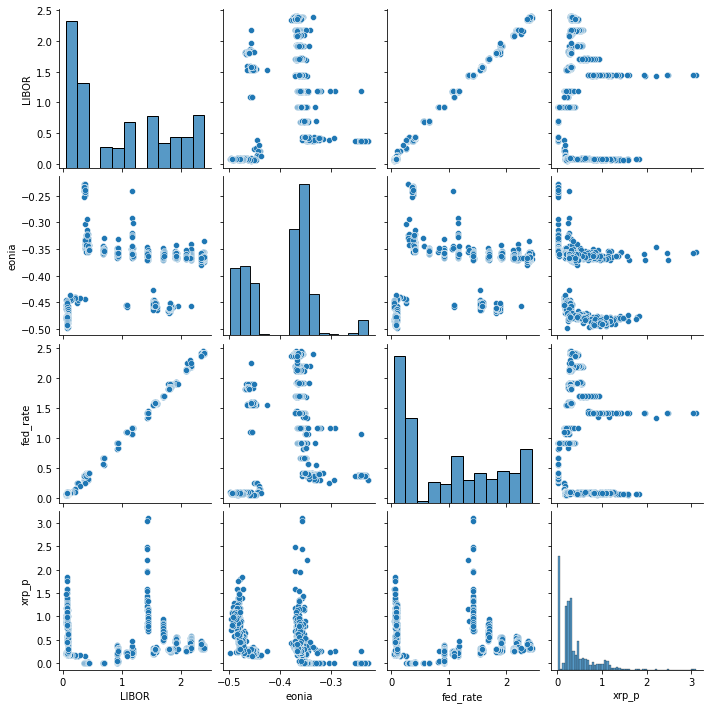

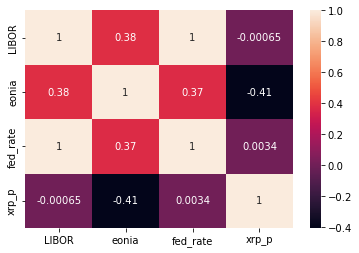

LIBOR     eonia  fed_rate    doge_p
LIBOR     1.000000  0.383357  0.999565 -0.362616
eonia     0.383357  1.000000  0.370571 -0.478696
fed_rate  0.999565  0.370571  1.000000 -0.354710
doge_p   -0.362616 -0.478696 -0.354710  1.000000

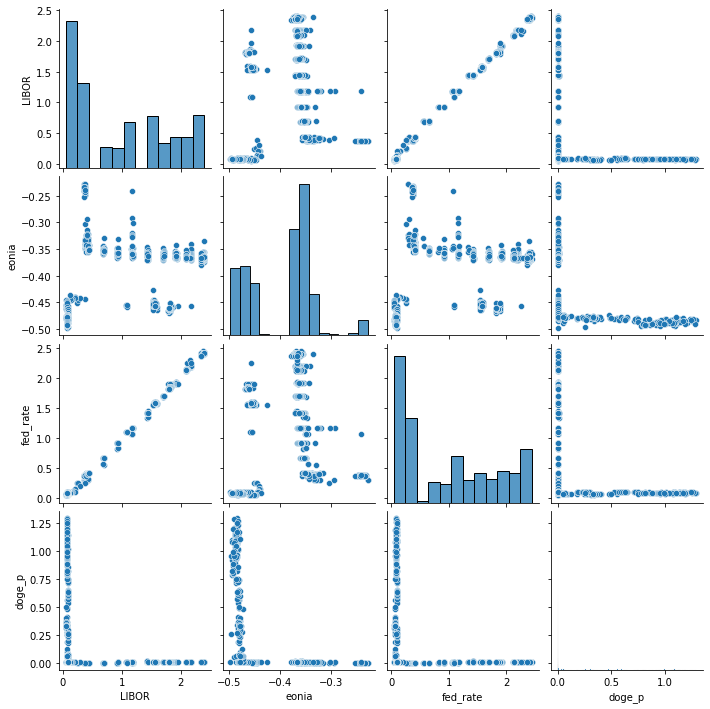

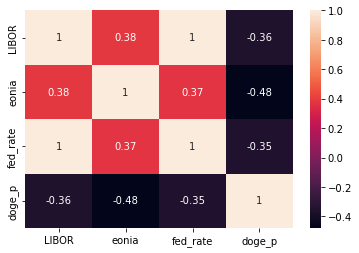

In [190]:
for i in rates_df_list:
    correlations_analysis(i)